In [1]:
import torch

from torch.nn import Module, Linear, ReLU, Tanh
from torch.autograd import Variable
from utils import build_data

from torch.nn import MSELoss
from torch.optim.sgd import SGD

import matplotlib.pyplot as plt

In [2]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = Linear(2, 25)
        self.hidden2 = Linear(25, 25)
        self.hidden3 = Linear(25, 25)
        self.out = Linear(25, 2)

    def forward(self, x):
        relu = ReLU()
        tanh = Tanh()
        x = relu(self.hidden(x))
        x = relu(self.hidden2(x))
        x = tanh(self.hidden3(x))
        x = self.out(x)
        return x

In [3]:
def acc(x, y):
    correct = 0
    total = 1000
    for i in range(1000):
        images = Variable(x[i])
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 0)
        _, true = y[i].max(0)
        if predicted[0] == true[0]:
            correct += 1
    return correct/total

In [4]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [5]:
model = Net()

# Loss and Optimizer
criterion = MSELoss()  
optimizer = SGD(model.parameters(), lr=0.01)  

num_epochs=50
batch_size=1

In [6]:
# Train the Model
train_loss = []
val_loss = []
train_acc = []

for epoch in range(num_epochs):
    for i in range(1000): 
        # Convert torch tensor to Variable
        images = Variable(x_train[i].view(-1, 2))
        labels = Variable(y_train[i])
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()  # zero the gradient buffer
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    train_loss.append(loss.data[0])
    train_acc.append(acc(x_train, y_train))

    print('Loss at epoch {} : {}'.format(epoch + 1, loss.data[0]))
    
print('Training loss : {}'.format(loss.data[0]))
print('Training accuracy : {}'.format(acc(x_train, y_train)))

print('Validation accuracy : {}'.format(acc(x_validation, y_validation)))

Loss at epoch 1 : 0.23201005160808563
Loss at epoch 2 : 0.21972689032554626
Loss at epoch 3 : 0.1999148726463318
Loss at epoch 4 : 0.1679125279188156
Loss at epoch 5 : 0.11988916993141174
Loss at epoch 6 : 0.052689872682094574
Loss at epoch 7 : 0.0012036398984491825
Loss at epoch 8 : 0.02642706036567688
Loss at epoch 9 : 0.020362237468361855
Loss at epoch 10 : 0.012968648225069046
Loss at epoch 11 : 0.010610157623887062
Loss at epoch 12 : 0.011414162814617157
Loss at epoch 13 : 0.010166605934500694
Loss at epoch 14 : 0.009512719698250294
Loss at epoch 15 : 0.011500348336994648
Loss at epoch 16 : 0.011760212481021881
Loss at epoch 17 : 0.012066235765814781
Loss at epoch 18 : 0.012008659541606903
Loss at epoch 19 : 0.012869412079453468
Loss at epoch 20 : 0.013750368729233742
Loss at epoch 21 : 0.013743746094405651
Loss at epoch 22 : 0.013069256208837032
Loss at epoch 23 : 0.013537455350160599
Loss at epoch 24 : 0.014637703076004982
Loss at epoch 25 : 0.01612474024295807
Loss at epoch 26 

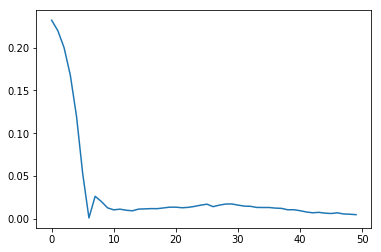

In [7]:
plt.plot(train_loss)